# Assignment 13.11.17 - Patrick Werner

## Exercise 1
![Mindmap](mindmap.png)

## Exercise 2

Unfortunately my implementation for general NN did not work, instead I used a hardcoded 2-2-1 neural network.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

class NeuronLayer:
    def __init__(self, nNeurons, nInputs, *args):
        if len(args) == 0:
            # Random weights with mean 0
            self.weights = 2 * np.random.random((nInputs, nNeurons)) - 1
        else:
            # Weights set to args
            self.weights = np.ones((nInputs, nNeurons)) * args[0]

class NeuralNetwork:
    def __init__(self, hiddenLayer, outputLayer):
        self.hiddenLayer = hiddenLayer
        self.outputLayer = outputLayer

    def activationFunction(self, x):
        # Sigmoid
        return 1 / (1 + np.exp(-x))

    def activationFunctionDerivative(self, x):
        # Sigmoid derivative
        return x * (1 - x)

    def train(self, trainingSetInputs, trainingSetOutputs, learningRate, nEpochs):
        for epoch in range(nEpochs):
            l1Output, l2Output = self.forwardpropagation(trainingSetInputs)
            
            l1Delta, l2Delta = self.backwardpropagation(l1Output, l2Output, trainingSetOutputs)
            
            self.updateWeights(l1Delta, l2Delta, l1Output, trainingSetInputs, learningRate)
            
    def forwardpropagation(self, inputs):
        l1Output = self.activationFunction(np.dot(inputs, self.hiddenLayer.weights))
        l2Output = self.activationFunction(np.dot(l1Output, self.outputLayer.weights))
        return l1Output, l2Output
    
    def backwardpropagation(self, l1Output, l2Output, expected):
        l2Error = expected - l2Output
        error.append(np.abs(l2Error))
        l2Delta = l2Error * self.activationFunctionDerivative(l2Output)

        l1Error = l2Delta.dot(self.outputLayer.weights.T)
        l1Delta = l1Error * self.activationFunctionDerivative(l1Output)
        return l1Delta, l2Delta
    
    def updateWeights(self, l1Delta, l2Delta, l1Output, inputs, learningRate):
        l1Adjustment = inputs.T.dot(l1Delta) * learningRate
        l2Adjustment = l1Output.T.dot(l2Delta) * learningRate

        self.hiddenLayer.weights += l1Adjustment
        self.outputLayer.weights += l2Adjustment

    def print(self):
        print("Hidden layer:")
        print(self.hiddenLayer.weights)
        print("Output layer 2:")
        print(self.outputLayer.weights)

In [15]:
l1 = NeuronLayer(2,2,1)
l2 = NeuronLayer(1,2,1)

error = []
nn = NeuralNetwork(l1, l2)
a,b = nn.forwardpropagation([1,1])
print(a,b)
c,d = nn.backwardpropagation(a, b, [0])
print(c,d)

[ 0.88079708  0.88079708] [ 0.8534092]
[-0.01120945 -0.01120945] [-0.10676314]


### a)

#### i) initial weights = 0

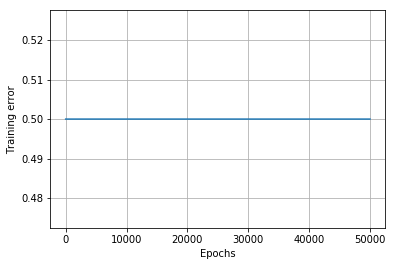

In [2]:
hiddenLayer = NeuronLayer(2, 2, 0)
outputLayer = NeuronLayer(1, 2, 0)
nn = NeuralNetwork(hiddenLayer, outputLayer)

trainingSetInputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
trainingSetOutputs = np.array([[0], [1], [1], [0]])

error = []
nn.train(trainingSetInputs, trainingSetOutputs, 0.01, 1)

plt.plot(np.mean(error,1))
plt.xlabel("Epochs")
plt.ylabel("Training error")
plt.grid()
plt.show()

#### ii) random inital weights

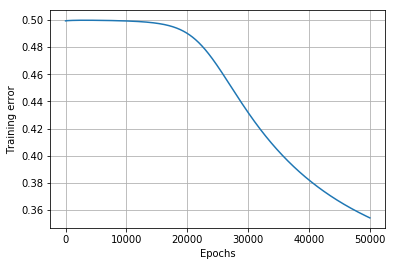

In [3]:
hiddenLayer = NeuronLayer(2, 2)
outputLayer = NeuronLayer(1, 2)
nn = NeuralNetwork(hiddenLayer, outputLayer)

trainingSetInputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
trainingSetOutputs = np.array([[0], [1], [1], [0]])

error = []
nn.train(trainingSetInputs, trainingSetOutputs, 0.01, 50000)

plt.plot(np.mean(error,1))
plt.xlabel("Epochs")
plt.ylabel("Training error")
plt.grid()
plt.show()

As can be seen the neural network with initial weights of 0 does not converge at all.
This is because of the multiplication of the weights with the delta during the backpropagation will always result in zero and as such zero adjustments are made to the weights.

### b) Experiments with different learning rates

In [4]:
trainingSetInputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
trainingSetOutputs = np.array([[0], [1], [1], [0]])

hiddenLayer = NeuronLayer(2, 2)
outputLayer = NeuronLayer(1, 2)
nn = NeuralNetwork(hiddenLayer, outputLayer)
error = []
nn.train(trainingSetInputs, trainingSetOutputs, 0.01, 50000)
error0 = error

hiddenLayer = NeuronLayer(2, 2)
outputLayer = NeuronLayer(1, 2)
nn = NeuralNetwork(hiddenLayer, outputLayer)
error = []
nn.train(trainingSetInputs, trainingSetOutputs, 0.1, 50000)
error1 = error

hiddenLayer = NeuronLayer(2, 2)
outputLayer = NeuronLayer(1, 2)
nn = NeuralNetwork(hiddenLayer, outputLayer)
error = []
nn.train(trainingSetInputs, trainingSetOutputs, 0.3, 50000)
error2 = error

hiddenLayer = NeuronLayer(2, 2)
outputLayer = NeuronLayer(1, 2)
nn = NeuralNetwork(hiddenLayer, outputLayer)
error = []
nn.train(trainingSetInputs, trainingSetOutputs, 0.5, 50000)
error3 = error

hiddenLayer = NeuronLayer(2, 2)
outputLayer = NeuronLayer(1, 2)
nn = NeuralNetwork(hiddenLayer, outputLayer)
error = []
nn.train(trainingSetInputs, trainingSetOutputs, 0.9, 50000)
error4 = error

##### Convergence

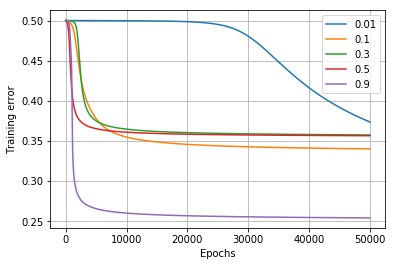

In [5]:
plt.plot(np.mean(error0,1), label="0.01")
plt.plot(np.mean(error1,1), label="0.1")
plt.plot(np.mean(error2,1), label="0.3")
plt.plot(np.mean(error3,1), label="0.5")
plt.plot(np.mean(error4,1), label="0.9")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Training error")
plt.grid()
plt.show()

As can be seen higher learning rates converge faster.

##### Surfaces

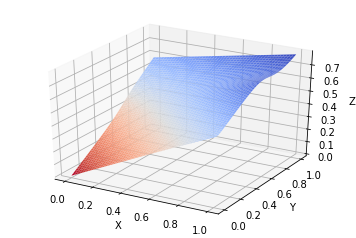

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = np.linspace(0, 1, 5000)
Y = np.linspace(0, 1, 5000)
X, Y = np.meshgrid(X, Y)
Z = X * np.array(error0)[1::10][:,0] + Y * np.array(error0)[1::10][:,3]
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm_r) 
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

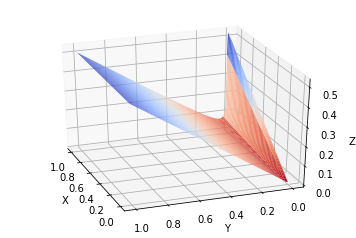

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Z = X * np.array(error4)[1::10][:,0] + Y * np.array(error4)[1::10][:,3]
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm_r) 
ax.view_init(30, 160)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## Exercise 3

### 1) f(x) = 1/x
#### Set up data

In [8]:
nTrainingSamples = 1000
nTestSamples = 100

trainingSetInputs = np.random.uniform(1, 100, (nTrainingSamples, 1))
trainingSetOutputs = 1/trainingSetInputs

testSetInputs = np.random.uniform(1, 100, (nTestSamples, 1))
testSetOutputs = 1/testSetInputs

#### Train

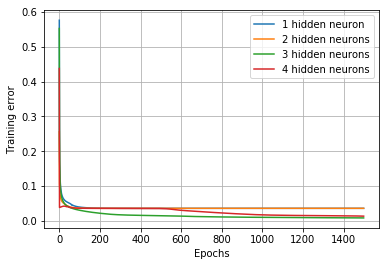

In [9]:
nEpochs = 1500
learningRate = 0.01

nHiddenNeurons = 1
hiddenLayer = NeuronLayer(nHiddenNeurons, 1)
outputLayer = NeuronLayer(1, nHiddenNeurons)
nn0 = NeuralNetwork(hiddenLayer, outputLayer)
error = []
nn0.train(trainingSetInputs, trainingSetOutputs, learningRate, nEpochs)
error0 = error

nHiddenNeurons = 2
hiddenLayer = NeuronLayer(nHiddenNeurons, 1)
outputLayer = NeuronLayer(1, nHiddenNeurons)
nn1 = NeuralNetwork(hiddenLayer, outputLayer)
error = []
nn1.train(trainingSetInputs, trainingSetOutputs, learningRate, nEpochs)
error1 = error

nHiddenNeurons = 3
hiddenLayer = NeuronLayer(nHiddenNeurons, 1)
outputLayer = NeuronLayer(1, nHiddenNeurons)
nn2 = NeuralNetwork(hiddenLayer, outputLayer)
error = []
nn2.train(trainingSetInputs, trainingSetOutputs, learningRate, nEpochs)
error2 = error

nHiddenNeurons = 4
hiddenLayer = NeuronLayer(nHiddenNeurons, 1)
outputLayer = NeuronLayer(1, nHiddenNeurons)
nn3 = NeuralNetwork(hiddenLayer, outputLayer)
error = []
nn3.train(trainingSetInputs, trainingSetOutputs, learningRate, nEpochs)
error3 = error

plt.plot(np.mean(error0,1), label="1 hidden neuron")
plt.plot(np.mean(error1,1), label="2 hidden neurons")
plt.plot(np.mean(error2,1), label="3 hidden neurons")
plt.plot(np.mean(error3,1), label="4 hidden neurons")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Training error")
plt.grid()
plt.show()

#### Test

In [10]:
a, output0 = nn0.forwardpropagation(testSetInputs)
a, output1 = nn1.forwardpropagation(testSetInputs)
a, output2 = nn2.forwardpropagation(testSetInputs)
a, output3 = nn3.forwardpropagation(testSetInputs)

print("Test error of NN with 1 hidden neuron: ", np.mean(np.abs(output0 - testSetOutputs)))
print("Test error of NN with 2 hidden neurons:", np.mean(np.abs(output1 - testSetOutputs)))
print("Test error of NN with 3 hidden neurons:", np.mean(np.abs(output2 - testSetOutputs)))
print("Test error of NN with 4 hidden neurons:", np.mean(np.abs(output3 - testSetOutputs)))

Test error of NN with 1 hidden neuron:  0.0337873603214
Test error of NN with 2 hidden neurons: 0.0337873603214
Test error of NN with 3 hidden neurons: 0.0071775232614
Test error of NN with 4 hidden neurons: 0.0129427756797


### 2) log10(x)

In [11]:
nTrainingSamples = 1000
nTestSamples = 100

trainingSetInputs = np.random.uniform(1, 10, (nTrainingSamples, 1))
trainingSetOutputs = np.log10(trainingSetInputs)

testSetInputs = np.random.uniform(1, 10, (nTestSamples, 1))
testSetOutputs = np.log10(testSetInputs)

#### Train

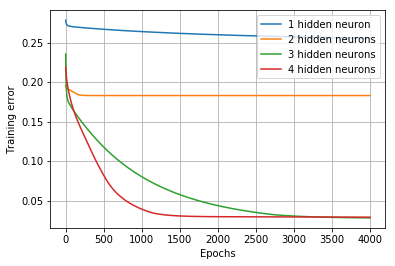

In [12]:
nEpochs = 4000
learningRate = 0.001

nHiddenNeurons = 1
hiddenLayer = NeuronLayer(nHiddenNeurons, 1)
outputLayer = NeuronLayer(1, nHiddenNeurons)
nn0 = NeuralNetwork(hiddenLayer, outputLayer)
error = []
nn0.train(trainingSetInputs, trainingSetOutputs, learningRate, nEpochs)
error0 = error

nHiddenNeurons = 2
hiddenLayer = NeuronLayer(nHiddenNeurons, 1)
outputLayer = NeuronLayer(1, nHiddenNeurons)
nn1 = NeuralNetwork(hiddenLayer, outputLayer)
error = []
nn1.train(trainingSetInputs, trainingSetOutputs, learningRate, nEpochs)
error1 = error

nHiddenNeurons = 3
hiddenLayer = NeuronLayer(nHiddenNeurons, 1)
outputLayer = NeuronLayer(1, nHiddenNeurons)
nn2 = NeuralNetwork(hiddenLayer, outputLayer)
error = []
nn2.train(trainingSetInputs, trainingSetOutputs, learningRate, nEpochs)
error2 = error

nHiddenNeurons = 4
hiddenLayer = NeuronLayer(nHiddenNeurons, 1)
outputLayer = NeuronLayer(1, nHiddenNeurons)
nn3 = NeuralNetwork(hiddenLayer, outputLayer)
error = []
nn3.train(trainingSetInputs, trainingSetOutputs, learningRate, nEpochs)
error3 = error

plt.plot(np.mean(error0,1), label="1 hidden neuron")
plt.plot(np.mean(error1,1), label="2 hidden neurons")
plt.plot(np.mean(error2,1), label="3 hidden neurons")
plt.plot(np.mean(error3,1), label="4 hidden neurons")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Training error")
plt.grid()
plt.show()

#### Test

In [13]:
a, output0 = nn0.forwardpropagation(testSetInputs)
a, output1 = nn1.forwardpropagation(testSetInputs)
a, output2 = nn2.forwardpropagation(testSetInputs)
a, output3 = nn3.forwardpropagation(testSetInputs)

print("Test error of NN with 1 hidden neuron: ", np.mean(np.abs(output0 - testSetOutputs)))
print("Test error of NN with 2 hidden neurons:", np.mean(np.abs(output1 - testSetOutputs)))
print("Test error of NN with 3 hidden neurons:", np.mean(np.abs(output2 - testSetOutputs)))
print("Test error of NN with 4 hidden neurons:", np.mean(np.abs(output3 - testSetOutputs)))

Test error of NN with 1 hidden neuron:  0.229324861231
Test error of NN with 2 hidden neurons: 0.170329396222
Test error of NN with 3 hidden neurons: 0.0260309125682
Test error of NN with 4 hidden neurons: 0.0285624218337


### 3) exp(-x)

In [14]:
nTrainingSamples = 1000
nTestSamples = 100

trainingSetInputs = np.random.uniform(1, 10, (nTrainingSamples, 1))
trainingSetOutputs = np.exp(-trainingSetInputs)

testSetInputs = np.random.uniform(1, 10, (nTestSamples, 1))
testSetOutputs = np.exp(-testSetInputs)

#### Train

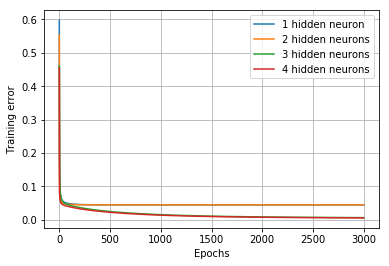

In [15]:
nEpochs = 3000
learningRate = 0.01

nHiddenNeurons = 1
hiddenLayer = NeuronLayer(nHiddenNeurons, 1)
outputLayer = NeuronLayer(1, nHiddenNeurons)
nn0 = NeuralNetwork(hiddenLayer, outputLayer)
error = []
nn0.train(trainingSetInputs, trainingSetOutputs, learningRate, nEpochs)
error0 = error

nHiddenNeurons = 2
hiddenLayer = NeuronLayer(nHiddenNeurons, 1)
outputLayer = NeuronLayer(1, nHiddenNeurons)
nn1 = NeuralNetwork(hiddenLayer, outputLayer)
error = []
nn1.train(trainingSetInputs, trainingSetOutputs, learningRate, nEpochs)
error1 = error

nHiddenNeurons = 3
hiddenLayer = NeuronLayer(nHiddenNeurons, 1)
outputLayer = NeuronLayer(1, nHiddenNeurons)
nn2 = NeuralNetwork(hiddenLayer, outputLayer)
error = []
nn2.train(trainingSetInputs, trainingSetOutputs, learningRate, nEpochs)
error2 = error

nHiddenNeurons = 4
hiddenLayer = NeuronLayer(nHiddenNeurons, 1)
outputLayer = NeuronLayer(1, nHiddenNeurons)
nn3 = NeuralNetwork(hiddenLayer, outputLayer)
error = []
nn3.train(trainingSetInputs, trainingSetOutputs, learningRate, nEpochs)
error3 = error

plt.plot(np.mean(error0,1), label="1 hidden neuron")
plt.plot(np.mean(error1,1), label="2 hidden neurons")
plt.plot(np.mean(error2,1), label="3 hidden neurons")
plt.plot(np.mean(error3,1), label="4 hidden neurons")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Training error")
plt.grid()
plt.show()

#### Test

In [16]:
a, output0 = nn0.forwardpropagation(testSetInputs)
a, output1 = nn1.forwardpropagation(testSetInputs)
a, output2 = nn2.forwardpropagation(testSetInputs)
a, output3 = nn3.forwardpropagation(testSetInputs)

print("Test error of NN with 1 hidden neuron: ", np.mean(np.abs(output0 - testSetOutputs)))
print("Test error of NN with 2 hidden neurons:", np.mean(np.abs(output1 - testSetOutputs)))
print("Test error of NN with 3 hidden neurons:", np.mean(np.abs(output2 - testSetOutputs)))
print("Test error of NN with 4 hidden neurons:", np.mean(np.abs(output3 - testSetOutputs)))

Test error of NN with 1 hidden neuron:  0.0464204750901
Test error of NN with 2 hidden neurons: 0.0464204750901
Test error of NN with 3 hidden neurons: 0.00625161734336
Test error of NN with 4 hidden neurons: 0.00541749093267


### 4) sin(x)

In [17]:
nTrainingSamples = 1000
nTestSamples = 100

trainingSetInputs = np.random.uniform(1, np.pi/2, (nTrainingSamples, 1))
trainingSetOutputs = np.sin(trainingSetInputs)

testSetInputs = np.random.uniform(1, np.pi/2, (nTestSamples, 1))
testSetOutputs = np.sin(testSetInputs)

#### Train

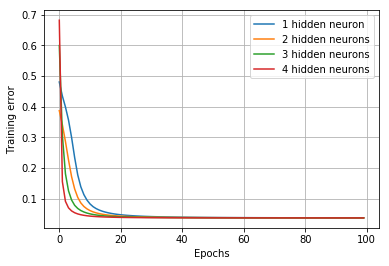

In [18]:
nEpochs = 100
learningRate = 0.01

nHiddenNeurons = 1
hiddenLayer = NeuronLayer(nHiddenNeurons, 1)
outputLayer = NeuronLayer(1, nHiddenNeurons)
nn0 = NeuralNetwork(hiddenLayer, outputLayer)
error = []
nn0.train(trainingSetInputs, trainingSetOutputs, learningRate, nEpochs)
error0 = error

nHiddenNeurons = 2
hiddenLayer = NeuronLayer(nHiddenNeurons, 1)
outputLayer = NeuronLayer(1, nHiddenNeurons)
nn1 = NeuralNetwork(hiddenLayer, outputLayer)
error = []
nn1.train(trainingSetInputs, trainingSetOutputs, learningRate, nEpochs)
error1 = error

nHiddenNeurons = 3
hiddenLayer = NeuronLayer(nHiddenNeurons, 1)
outputLayer = NeuronLayer(1, nHiddenNeurons)
nn2 = NeuralNetwork(hiddenLayer, outputLayer)
error = []
nn2.train(trainingSetInputs, trainingSetOutputs, learningRate, nEpochs)
error2 = error

nHiddenNeurons = 4
hiddenLayer = NeuronLayer(nHiddenNeurons, 1)
outputLayer = NeuronLayer(1, nHiddenNeurons)
nn3 = NeuralNetwork(hiddenLayer, outputLayer)
error = []
nn3.train(trainingSetInputs, trainingSetOutputs, learningRate, nEpochs)
error3 = error

plt.plot(np.mean(error0,1), label="1 hidden neuron")
plt.plot(np.mean(error1,1), label="2 hidden neurons")
plt.plot(np.mean(error2,1), label="3 hidden neurons")
plt.plot(np.mean(error3,1), label="4 hidden neurons")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Training error")
plt.grid()
plt.show()

#### Test

In [19]:
a, output0 = nn0.forwardpropagation(testSetInputs)
a, output1 = nn1.forwardpropagation(testSetInputs)
a, output2 = nn2.forwardpropagation(testSetInputs)
a, output3 = nn3.forwardpropagation(testSetInputs)

print("Test error of NN with 1 hidden neuron: ", np.mean(np.abs(output0 - testSetOutputs)))
print("Test error of NN with 2 hidden neurons:", np.mean(np.abs(output1 - testSetOutputs)))
print("Test error of NN with 3 hidden neurons:", np.mean(np.abs(output2 - testSetOutputs)))
print("Test error of NN with 4 hidden neurons:", np.mean(np.abs(output3 - testSetOutputs)))

Test error of NN with 1 hidden neuron:  0.0369332429466
Test error of NN with 2 hidden neurons: 0.0375655816077
Test error of NN with 3 hidden neurons: 0.037368441738
Test error of NN with 4 hidden neurons: 0.0371900387319


As can be seen from the experiments, different functions need different amounts of hidden nodes to converge the fastest.

## Exercise 4

Questions are provided in a separate textfile.